> 📘 This notebook is created and maintained by **Teslim Uthman Adeyanju**  
> 📧 Connect with me on [LinkedIn](https://www.linkedin.com/in/adeyanjuteslimuthman) or visit my [website](https://adeyanjuteslim.co.uk).  
> 🔗 [LinkedIn](https://www.linkedin.com/in/adeyanjuteslimuthman) | 🌐 [Blog](https://adeyanjuteslim.co.uk) | 📬 [info@adeyanjuteslim.co.uk](mailto:info@adeyanjuteslim.co.uk)


# **Customer Behavior & Marketing Influence Prediction Project**
___

Goal: Understand customer behavior patterns and predict their return likelihood and marketing influence. Also, identify customer segments using clustering techniques. Deploy an interactive dashboard for stakeholders.

### Table of Contents

The notebook is organized into the following sections:
1. **Introduction**
2. **Data Preprocessing**
3. **Exploratory Data Analysis (EDA)**
4. **Feature Engineering**
5. **Modeling**
6. **Clustering**
7. **Model Evaluation**
8. **Deployment**

# 📚 1.0 INTRODUCTION


<div style="font-family: Avenir, sans-serif; font-size: 16px; line-height: 1.6; color: white; background-color: #333; padding: 10px; border-radius: 5px;">
This section provides an overview of the dataset and the problem we are trying to solve. We will also discuss the data overview, project objective, methodology and the tools (libaries) we will use to solve the problem.

</div>

## 🔍 1.1 Project Overview
____

**Link to Dataset**: [TechCorner Mobile Purchase & Engagement Data](https://www.kaggle.com/datasets/shohinurpervezshohan/techcorner-mobile-purchase-and-engagement-data)

The project focuses on analyzing customer behavioral patterns and evaluating the impact of marketing strategies (such as Facebook engagement and word-of-mouth referrals) on purchasing behavior. By using classification and clustering models, this project aims to:

- Predict whether a customer will return,
- Determine if a customer was influenced by Facebook marketing,
- Segment customers into meaningful groups based on their engagement and purchase attributes.

This tool can be helpful for business decision-makers, marketing teams, and retail analysts who want to understand how different channels influence customer retention and purchases.


**Dataset Summary**

This project uses a real-world dataset containing customer engagement and sales data collected from a mobile phone retail shop. The dataset has rows representing individual customers and includes categorical and numerical attributes relevant to understanding purchase decisions and customer profiles.

**Dataset Features**

| Feature                                   | Description                                                        |
|-------------------------------------------|--------------------------------------------------------------------|
| `Cus.ID`                                  | Unique identifier for each customer                                |
| `Date`                                    | Date of the customer’s visit or purchase                           |
| `Cus. Location`                           | Customer's location (e.g., Rangamati Sadar, Outside Rangamati)     |
| `Age`                                     | Age of the customer                                                |
| `Gender`                                  | Gender of the customer (Male/Female)                               |
| `Mobile Name`                             | Brand and model of the mobile purchased                            |
| `Sell Price`                              | Price at which the mobile was sold (numeric)                       |
| `Does he/she Come from Facebook Page?`    | Whether the customer arrived through Facebook                      |
| `Does he/she Followed Our Page?`          | Whether the customer follows the store's Facebook page             |
| `Did he/she buy any mobile before?`       | Whether the customer has previously made a purchase                |
| `Did he/she hear of our shop before?`     | Whether the customer had prior awareness of the shop               |



<div style="font-family: Avenir, sans-serif; font-size: 16px; line-height: 1.6; color: white; background-color: #333; padding: 10px; border-radius: 5px;">
</div>

## 🔍 1.2 Project Objective
___

The main objective of this project is to analyze customer behavior and marketing influence on purchasing decisions. The specific goals include:

### Project Classification Goals

1. **Classification Model 1:** Predict whether a customer is likely to **return** (Target: `previous_customer`)
2. **Classification Model 2:** Predict whether a customer was influenced by **Facebook marketing** (Target: `came_from_facebook`)



### Exploratory Data Analysis (EDA)
- Identify trends in customer source (e.g., Facebook, referral, walk-in)
- Analyze demographic patterns (age, gender, location)
- Examine brand preferences and mobile price distributions

### Classification Models
- Predict whether a customer will **return** in the future
- Predict whether a customer was **influenced by Facebook marketing**

### Clustering Models
- Segment customers into behavioral groups based on:
  - Demographics
  - Purchase behavior
  - Marketing engagement (e.g., follows page, referral)

### Deployment
- Build a user-friendly **Streamlit web app** to:
  - Accept customer input for real-time predictions
  - Visualize clusters and customer types
  - Explore dashboards with marketing insights


<div style="font-family: Avenir, sans-serif; font-size: 16px; line-height: 1.6; color: white; background-color: #333; padding: 10px; border-radius: 5px;">
</div>

## 🔍 1.3 Library Tools
___

The success of this project hinges on leveraging powerful Python libraries that enable prediction, feature engineering, modeling, and insightful visualization. These tools form the backbone of our notebook, streamlining the end-to-end process—from data retrieval and preparation to modeling and evaluation.

Below is a breakdown of the core libraries used in this project, logically grouped by functionality, along with their specific roles:

#### Data Manipulation and Analysis
- **`pandas`**: Data manipulation and preprocessing (e.g., filtering, grouping, merging)
- **`numpy`**: Numerical computations and array handling
- **`scipy`**: Statistical analysis and scientific computing


#### Data Visualization
- **`matplotlib`**: Foundational plotting library for static, animated, and interactive visualizations
- **`seaborn`**: High-level interface for drawing attractive statistical graphics built on top of matplotlib

#### Machine Learning
- **`scikit-learn`**: Comprehensive toolkit for modeling, preprocessing, pipelines, and feature selection
- **`xgboost`**: Efficient and scalable gradient boosting for classification and regression
- **`lightgbm`**: Fast, distributed, high-performance gradient boosting framework based on decision tree algorithms
- **`catboost`**: Gradient boosting library with support for categorical variables
- **`yellowbrick`**: Visual diagnostic tools for machine learning workflows


#### Model Evaluation and Selection
- **`sklearn.metrics`**: Metrics such as Accuracy, Precision, Recall, F1-Score, ROC-AUC for model evaluation
- **`sklearn.model_selection`**: Train-test splitting, cross-validation, and hyperparameter tuning utilities


<div style="font-family: Avenir, sans-serif; font-size: 16px; line-height: 1.6; color: white; background-color: #333; padding: 10px; border-radius: 5px;">
</div>

# 📚 2.0 DATA PREPROCESSING


<div style="font-family: Avenir, sans-serif; font-size: 16px; line-height: 1.6; color: white; background-color: #333; padding: 10px; border-radius: 5px;">

This section focuses on loading the dataset and performing data preprocessing tasks such as handling missing values, changing data types, and confirming the absence of duplicates. This will make our dataset ready for exploratory data analysis and model development.
</div>

## 🔍 2.1.0 Import Libraries
___

In [113]:
# Core Libraries
import numpy as np
import pandas as pd
import warnings


# Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.cm import ScalarMappable, coolwarm
from matplotlib.colors import Normalize
from matplotlib.gridspec import GridSpec
from mpl_toolkits.mplot3d import Axes3D
plt.style.use('ggplot')


<div style="font-family: Avenir, sans-serif; font-size: 16px; line-height: 1.6; color: white; background-color: #333; padding: 10px; border-radius: 5px;">
</div>

## 🔍 2.2.0 Data Loading 
___

In [185]:
df = pd.read_csv("data.csv", parse_dates=['Date'], dayfirst=True)

df.head()

,Cus.ID,Date,Cus. Location,Age,Gender,Mobile Name,Sell Price,Does he/she Come from Facebook Page?,Does he/she Followed Our Page?,Did he/she buy any mobile before?,Did he/she hear of our shop before?
0,1,2024-05-27,Rangamati Sadar,49,F,Galaxy A55 5G 8/128,17073.0,No,Yes,No,Yes
1,2,2024-05-27,Inside Rangamati,44,M,Redmi Note 12 Pro 8/128,15546.0,Yes,No,No,Yes
2,3,2024-05-27,Rangamati Sadar,45,M,R-70 Turbo 5G 6/128,26516.0,Yes,No,No,Yes
3,4,2024-05-27,Rangamati Sadar,46,M,R-70 Turbo 5G 6/128,21927.0,No,No,No,Yes
4,5,2024-05-27,Outside Rangamati,27,F,Vivo T3x 5G 8/128,16718.0,Yes,No,No,Yes


The dataset contains the following columns:

In [115]:
# Basic info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8871 entries, 0 to 8870
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype         
---  ------                                --------------  -----         
 0   Cus.ID                                8871 non-null   int64         
 1   Date                                  8871 non-null   datetime64[ns]
 2   Cus. Location                         8871 non-null   object        
 3   Age                                   8871 non-null   int64         
 4   Gender                                8871 non-null   object        
 5   Mobile Name                           8871 non-null   object        
 6   Sell Price                            8871 non-null   float64       
 7   Does he/she Come from Facebook Page?  8871 non-null   object        
 8   Does he/she Followed Our Page?        8871 non-null   object        
 9   Did he/she buy any mobile before?     8871 non-null   object        
 10  

## 🔍 2.3.0 Data Cleaning and Formatting
___

It is important to check the data frame shape before starting the data processing. This is important to know the number of rows and columns in the dataset.

In [116]:
# check the dataframe shape
df.shape

(8871, 11)

In [186]:
df.columns.to_list()

['Cus.ID',
 'Date',
 'Cus. Location',
 'Age',
 'Gender',
 'Mobile Name',
 'Sell Price',
 'Does he/she Come from Facebook Page?',
 'Does he/she Followed Our Page?',
 'Did he/she buy any mobile before?',
 'Did he/she hear of our shop before?']

In [187]:
# Rename columns for clarity and simplicity
df.columns = [
    'customer_id',
    'visit_date',
    'customer_location',
    'age',
    'gender',
    'mobile_name',
    'sell_price',
    'came_from_facebook',
    'follows_facebook_page',
    'previous_customer',
    'heard_about_shop',
]

In [188]:
# Drop irrelevant columns 
df.drop(columns=['customer_id','visit_date' ], inplace=True)

In [189]:
# check for the missing values
df.isnull().sum() / df.shape[0] * 100

customer_location        0.0
age                      0.0
gender                   0.0
mobile_name              0.0
sell_price               0.0
came_from_facebook       0.0
follows_facebook_page    0.0
previous_customer        0.0
heard_about_shop         0.0
dtype: float64

In [190]:
# transforming those columns to uniform content 
def clean_column_content(df, column_name):
    df[column_name] = df[column_name].astype(str)
    df[column_name] = df[column_name].str.lower()
    df[column_name] = df[column_name].str.replace(' ', '_')
    return df

for col in df.select_dtypes(include=['object']).columns:
    clean_categorical_data_for_use = clean_column_content(df, col)
    
df

,customer_location,age,gender,mobile_name,sell_price,came_from_facebook,follows_facebook_page,previous_customer,heard_about_shop
0,rangamati_sadar,49,f,galaxy_a55_5g_8/128,17073.0,no,yes,no,yes
1,inside_rangamati,44,m,redmi_note_12_pro_8/128,15546.0,yes,no,no,yes
2,rangamati_sadar,45,m,r-70_turbo_5g_6/128,26516.0,yes,no,no,yes
3,rangamati_sadar,46,m,r-70_turbo_5g_6/128,21927.0,no,no,no,yes
4,outside_rangamati,27,f,vivo_t3x_5g_8/128,16718.0,yes,no,no,yes
...,...,...,...,...,...,...,...,...,...
8866,outside_rangamati,34,m,iqoo_neo_9_pro_5g_12/256,21682.0,yes,yes,yes,yes
8867,inside_rangamati,48,m,moto_g85_5g_8/128,26493.0,no,no,no,no
8868,inside_rangamati,30,f,galaxy_m35_5g_8/128,16184.0,no,no,no,no
8869,inside_rangamati,22,f,galaxy_a55_5g_8/128,16663.0,yes,no,no,yes


## 🔍 2.3.0 Feature Engineering: 

### Engagement Score: 

In [191]:
# Create engagement_score based on social and awareness signals
df['engagement_score'] = (
    df['came_from_facebook'].map({'yes': 1, 'no': 0}) +
    df['follows_facebook_page'].map({'yes': 1, 'no': 0}) +
    df['heard_about_shop'].map({'yes': 1, 'no': 0})
)


### Engagement Levels:

In [192]:
# Bin the engagement score into levels
df['engagement_level'] = pd.cut(
    df['engagement_score'],
    bins=[-1, 1, 2, 3],
    labels=['Low', 'Medium', 'High']
)

### Price Category:

In [193]:
# Bin sell_price into price categories
df['price_category'] = pd.cut(
    df['sell_price'],
    bins=[0, 15000, 30000, df['sell_price'].max()],
    labels=['Low', 'Medium', 'High']
)

In [194]:
df

,customer_location,age,gender,mobile_name,sell_price,came_from_facebook,follows_facebook_page,previous_customer,heard_about_shop,engagement_score,engagement_level,price_category
0,rangamati_sadar,49,f,galaxy_a55_5g_8/128,17073.0,no,yes,no,yes,2,Medium,Medium
1,inside_rangamati,44,m,redmi_note_12_pro_8/128,15546.0,yes,no,no,yes,2,Medium,Medium
2,rangamati_sadar,45,m,r-70_turbo_5g_6/128,26516.0,yes,no,no,yes,2,Medium,Medium
3,rangamati_sadar,46,m,r-70_turbo_5g_6/128,21927.0,no,no,no,yes,1,Low,Medium
4,outside_rangamati,27,f,vivo_t3x_5g_8/128,16718.0,yes,no,no,yes,2,Medium,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...
8866,outside_rangamati,34,m,iqoo_neo_9_pro_5g_12/256,21682.0,yes,yes,yes,yes,3,High,Medium
8867,inside_rangamati,48,m,moto_g85_5g_8/128,26493.0,no,no,no,no,0,Low,Medium
8868,inside_rangamati,30,f,galaxy_m35_5g_8/128,16184.0,no,no,no,no,0,Low,Medium
8869,inside_rangamati,22,f,galaxy_a55_5g_8/128,16663.0,yes,no,no,yes,2,Medium,Medium


In [195]:
df.columns.to_list()

['customer_location',
 'age',
 'gender',
 'mobile_name',
 'sell_price',
 'came_from_facebook',
 'follows_facebook_page',
 'previous_customer',
 'heard_about_shop',
 'engagement_score',
 'engagement_level',
 'price_category']

In [196]:
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()
numerical_columns = df.select_dtypes(include=['number']).columns.tolist()

In [197]:
categorical_columns

['customer_location',
 'gender',
 'mobile_name',
 'came_from_facebook',
 'follows_facebook_page',
 'previous_customer',
 'heard_about_shop']

<div style="font-family: Avenir, sans-serif; font-size: 16px; line-height: 1.6; color: white; background-color: #333; padding: 10px; border-radius: 5px;">
</div>

# 📚 3.0 EXPLORATORY DATA ANALYSIS

<div style="font-family: Avenir, sans-serif; font-size: 16px; line-height: 1.6; color: white; background-color: #333; padding: 10px; border-radius: 5px;">
This section will focus on data visualization and statistical analysis to understand the distribution of attributes of categorical and numerical and relationships between them. We will use plots such as histograms, scatter plots, and correlation matrices to identify patterns and trends in the data.

</div>

## 🔍 3.1.0 Understanding Categorical Features
___


### 3.1.1 customer_location

In [128]:
print(df['customer_location'].value_counts(normalize=True))

customer_location
outside_rangamati    0.338181
rangamati_sadar      0.335024
inside_rangamati     0.326795
Name: proportion, dtype: float64


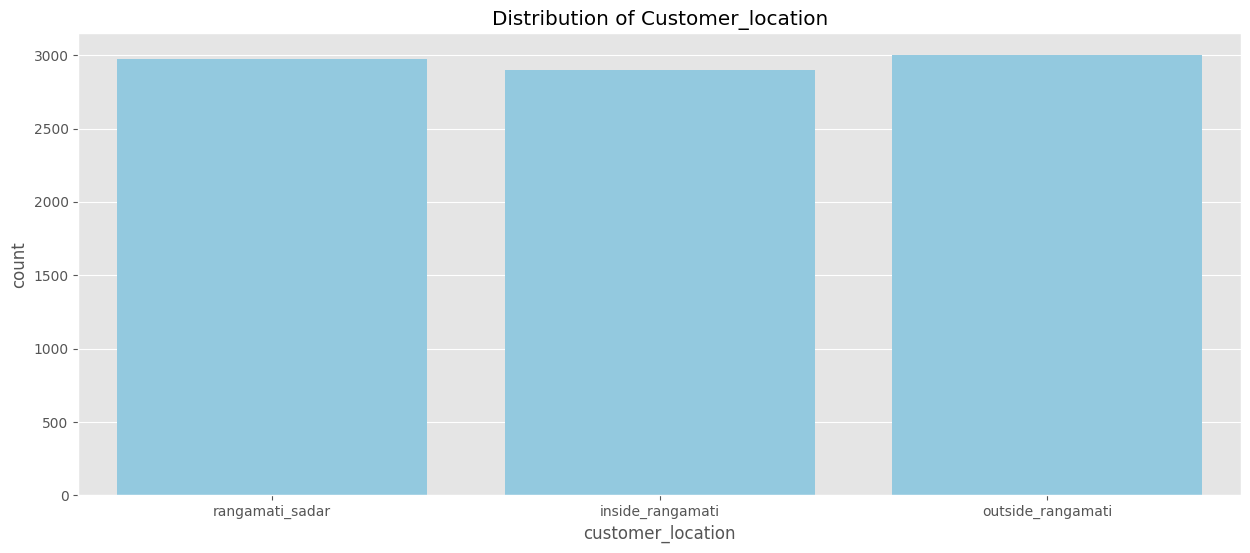

In [129]:
# visualize the distribution of the cut column
fig, ax = plt.subplots(figsize=(15, 6))
sns.countplot(x='customer_location', data=df, color='skyblue')
plt.title('Distribution of Customer_location')
plt.show()

<div style="font-family: Avenir, sans-serif; font-size: 16px; line-height: 1.6; color: white; background-color: #333; padding: 10px; border-radius: 5px;">
🖐️ <strong>Customer location:</strong><br>
This near-even split suggests that customer engagement is not heavily skewed toward any single location. The dataset is well-distributed geographically, which supports fair comparative analysis across regions. It also indicates that any marketing or customer behavior insights drawn from this data can be generalized across the different locations with reasonable confidence.
</div>

### 3.1.2 gender Distribution

In [130]:
print((df['gender'].value_counts(normalize=True) * 100).round())

gender
f    50.0
m    50.0
Name: proportion, dtype: float64


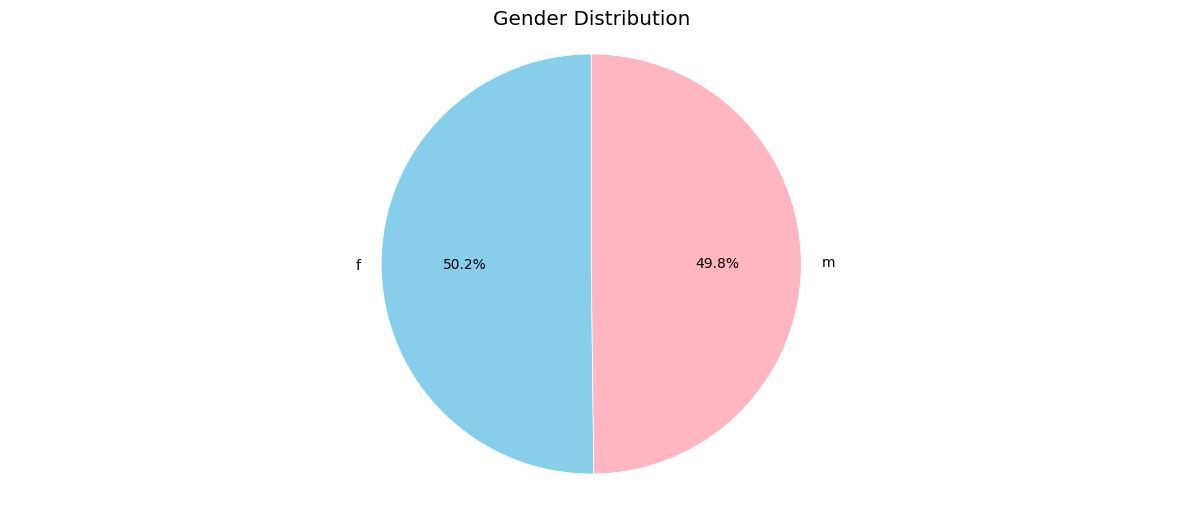

In [131]:
# Gender distribution as a pie chart
gender_counts = df['gender'].value_counts()
labels = gender_counts.index
sizes = gender_counts.values

fig, ax = plt.subplots(figsize=(15, 6))
ax.pie(
    sizes, 
    labels=labels, 
    autopct='%1.1f%%', 
    startangle=90, 
    colors=['skyblue', 'lightpink'], 
    wedgeprops={'edgecolor': 'white'}
)
plt.title("Gender Distribution")
plt.axis('equal')  
plt.show()

<div style="font-family: Avenir, sans-serif; font-size: 16px; line-height: 1.6; color: white; background-color: #333; padding: 10px; border-radius: 5px;">
🖐️ <strong>Insight on Gender:</strong><br>
The gender  distribution is a balance dataset with male and female participants, indicating a well gender represented in the dataset. This balance is crucial for ensuring that any analysis or model built on this data is fair and unbiased. 

</div>

### 3.1.3 mobile_name 

In [132]:
print(df['mobile_name'].value_counts())

mobile_name
moto_g85_5g_8/128           560
galaxy_s24_ultra_12/256     541
note_11s_6/128              538
pixel_8_pro_12/256          533
narzo_n53_4/64              530
redmi_note_12_pro_8/128     528
galaxy_m35_5g_8/128         528
galaxy_a55_5g_8/128         522
iqoo_z7_5g_6/128            522
iphone_16_pro_256gb         521
vivo_y200_5g_6/128          520
pixel_7a_8/128              518
vivo_t3x_5g_8/128           514
r-70_turbo_5g_6/128         511
iqoo_neo_9_pro_5g_12/256    502
note_14_pro_5g_8/256        495
iphone_16_pro_max_1tb       488
Name: count, dtype: int64


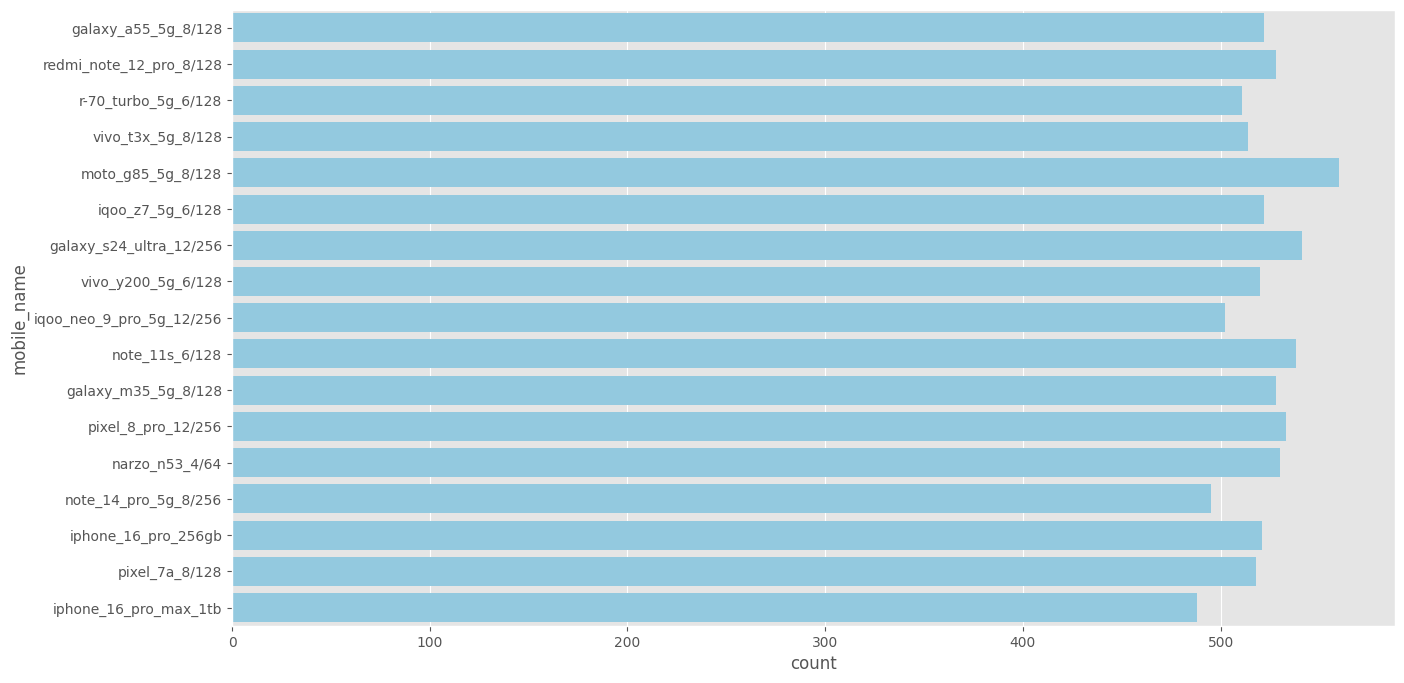

In [133]:
fig, ax = plt.subplots(figsize=(15, 8))
sns.countplot(data=df, y='mobile_name', color='skyblue')
plt.show()

<div style="font-family: Avenir, sans-serif; font-size: 16px; line-height: 1.6; color: white; background-color: #333; padding: 10px; border-radius: 5px;">

🖐️ **Insight on Mobile Preferences:**  
The dataset features **17 unique mobile models**, with **no single model dominating the distribution**. The top 5 models — *Moto G85 5G (8/128)*, *Galaxy S24 Ultra (12/256)*, *Note 11S (6/128)*, *Pixel 8 Pro (12/256)*, and *Narzo N53 (4/64)* — each account for **only around 5.8% to 6.2%** of total purchases.

This relatively **even distribution indicates a diverse customer preference**, suggesting that the market is **not brand-loyal or spec-biased**. It reflects a healthy product mix, making it suitable for segmentation analysis, identifying niche segments, or tailoring recommendations based on customer profile rather than dominant trends.

Such variety also implies that customers may be influenced more by personal needs or pricing strategies than by a single popular model, offering a good opportunity to explore associations with **location**, **gender**, or **source of referral**.
</div>

### 3.1.4 came_from_facebook 

In [134]:
print(df['came_from_facebook'].value_counts(normalize=True))

came_from_facebook
no     0.651674
yes    0.348326
Name: proportion, dtype: float64


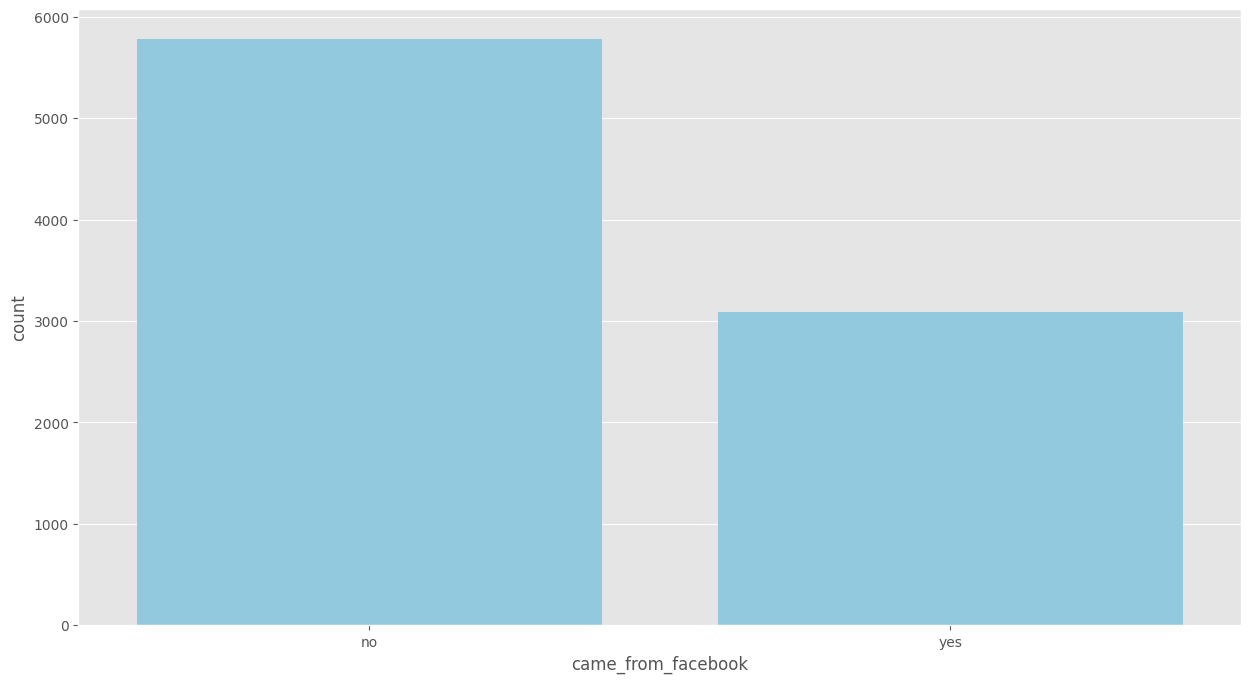

In [135]:
fig, ax = plt.subplots(figsize=(15, 8))
sns.countplot(data=df, x='came_from_facebook', color='skyblue')
plt.show()

<div style="font-family: Avenir, sans-serif; font-size: 16px; line-height: 1.6; color: white; background-color: #333; padding: 10px; border-radius: 5px;">

🖐️ **Insight on Facebook as a Customer Source:**  
The data shows that **65.2% of customers did not come from Facebook**, while **34.8% were acquired via Facebook**. This indicates that **Facebook plays a significant but not dominant role** in attracting customers.

The relatively high proportion of Facebook-origin customers highlights its value as a marketing channel, especially for reaching digitally engaged customers. However, since a larger portion of customers came through other sources, there is **an opportunity to either diversify marketing strategies** or **optimize Facebook campaigns** for better conversion.

This variable is worth exploring in relation to **returning customers**, **mobile preferences**, or **Facebook page followers** to understand the quality and retention potential of Facebook-acquired leads.
</div>

### 3.1.5 follows_facebook_page

In [136]:
print(df['follows_facebook_page'].value_counts(normalize=True))

follows_facebook_page
no     0.599031
yes    0.400969
Name: proportion, dtype: float64


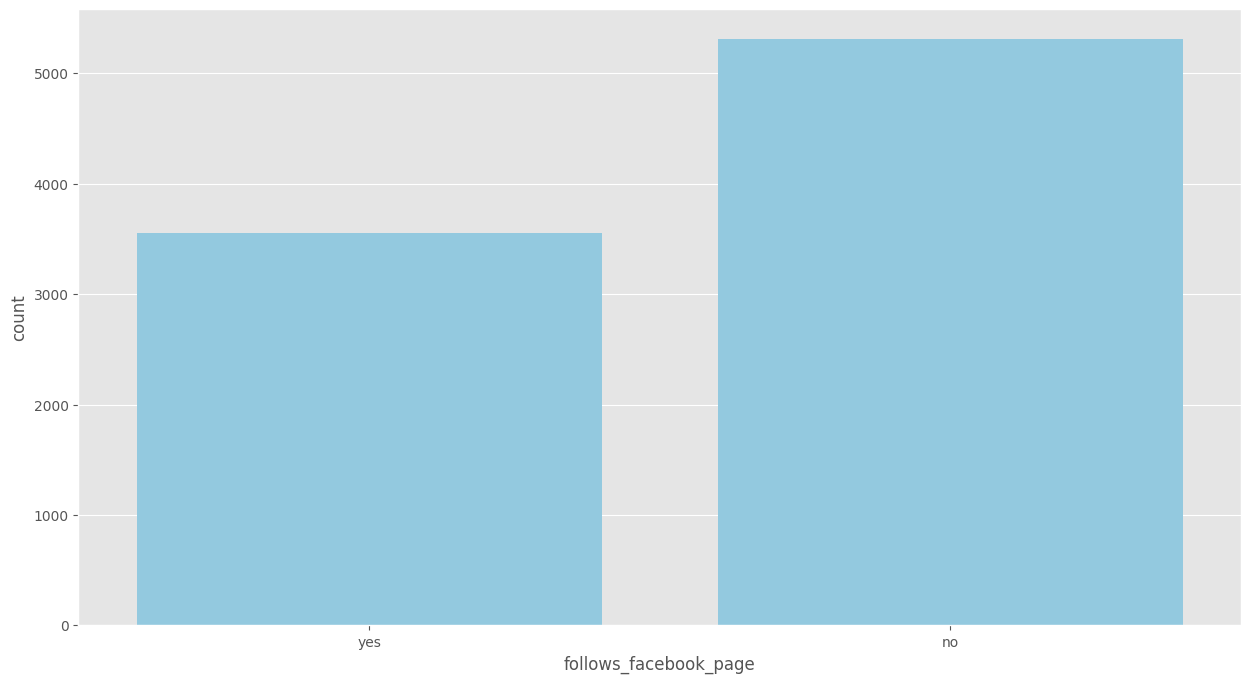

In [137]:
fig, ax = plt.subplots(figsize=(15, 8))
sns.countplot(data=df, x='follows_facebook_page', color='skyblue')
plt.show()

<div style="font-family: Avenir, sans-serif; font-size: 16px; line-height: 1.6; color: white; background-color: #333; padding: 10px; border-radius: 5px;">

🖐️ **Insight on Facebook Page Followers:**  
The data shows that **40.1% of customers follow the shop's Facebook page**, while **59.9% do not**. This indicates a **moderate level of social media engagement** among the customer base.

While a significant number of customers are not following the page, the sizeable portion that does presents a valuable audience for ongoing **brand engagement, promotions, and loyalty building**. It also suggests that **customers can be further nurtured through social media content**, especially those already connected.

Exploring the link between following the page and factors like **repeat purchases**, **Facebook referral**, or **purchase categories** may reveal whether social media engagement correlates with **customer retention or higher-value purchases**.
</div>

### 3.1.6 previous_customer 

In [138]:
print(df['previous_customer'].value_counts(normalize=True))

previous_customer
no     0.752677
yes    0.247323
Name: proportion, dtype: float64


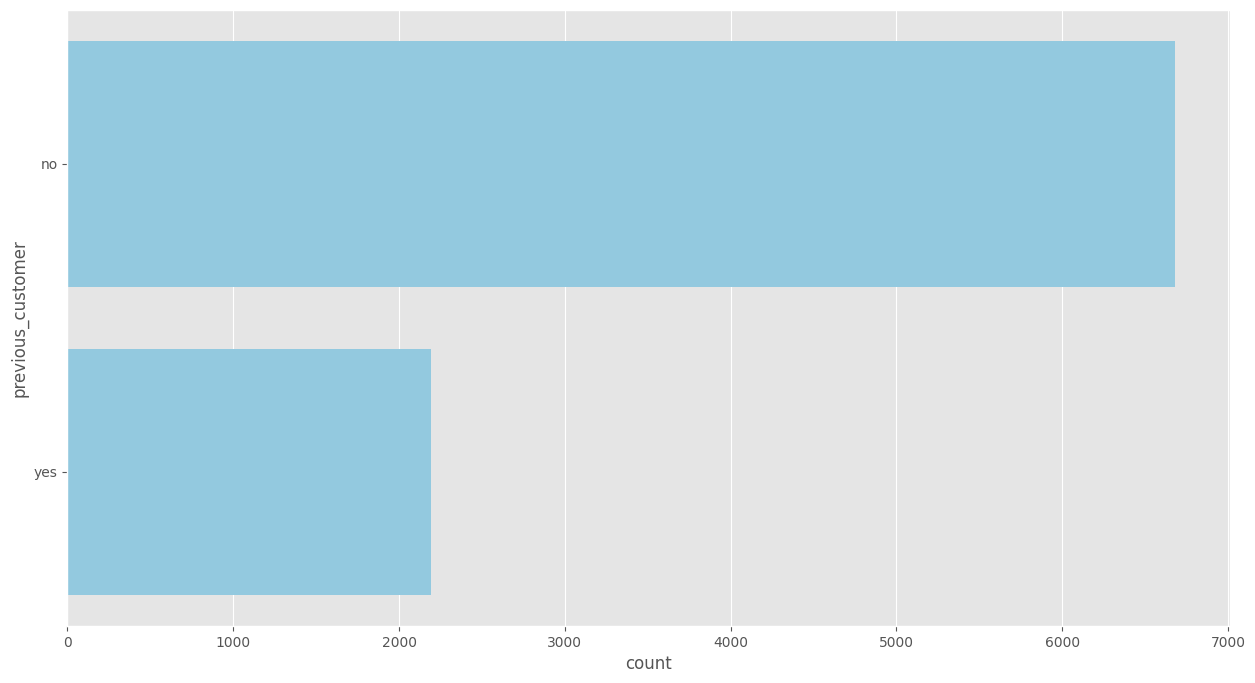

In [139]:
fig, ax = plt.subplots(figsize=(15, 8))
sns.countplot(data=df, y='previous_customer', color='skyblue')
plt.show()

<div style="font-family: Avenir, sans-serif; font-size: 16px; line-height: 1.6; color: white; background-color: #333; padding: 10px; border-radius: 5px;">

🖐️ **Insight on Returning Customers:**  
Only **24.7% of customers are returning**, while the majority — **75.3% — are first-time buyers**. This indicates a **low customer retention rate**, which may point to:

- Gaps in follow-up marketing or loyalty programs.
- Product or service satisfaction needing improvement.
- A business model focused more on customer acquisition than retention.

This insight emphasizes the need to explore what differentiates returning customers from one-time buyers — such as their **source (e.g., Facebook)**, **location**, or **mobile preferences** — and to design **targeted retention strategies** that can increase repeat purchases and customer lifetime value.
</div>

### 3.1.7 heard_about_shop

In [140]:

print(df['heard_about_shop'].value_counts(normalize=True))

heard_about_shop
yes    0.602412
no     0.397588
Name: proportion, dtype: float64


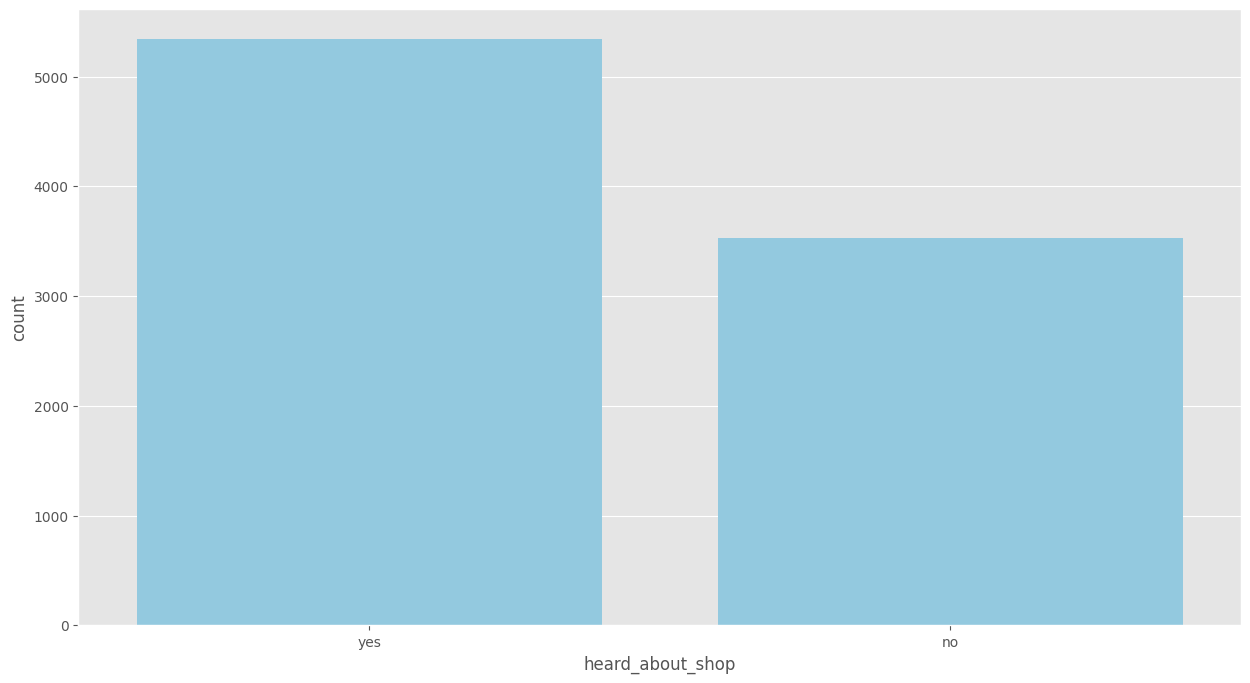

In [141]:
fig, ax = plt.subplots(figsize=(15, 8))
sns.countplot(data=df, x='heard_about_shop', color='skyblue')
plt.show()

<div style="font-family: Avenir, sans-serif; font-size: 16px; line-height: 1.6; color: white; background-color: #333; padding: 10px; border-radius: 5px;">

🖐️ **Insight on Customer Awareness:**  
The data shows that **60.2% of customers reported having heard about the shop before**, while **39.8% had not**. This suggests that **brand awareness is relatively strong**, with a majority of customers already familiar with the business before making a purchase.

This level of awareness could be the result of **word-of-mouth, previous exposure through marketing channels, or social media presence**. However, the fact that nearly 40% of customers were unfamiliar with the shop before indicates there's still **room for growth in visibility and outreach**.

Further exploration could involve checking if prior awareness correlates with:
- **Higher likelihood of being a returning customer**.
- **Higher-value purchases or specific mobile models**.
- **Following the Facebook page or being referred via Facebook**.
</div>

### 🧠 **Strategic Synthesis & Deeper Insight Using Categorical Analysis**

Based on the exploratory findings across categorical features—**customer location**, **gender**, **mobile preference**, **Facebook referral**, **Facebook page followers**, **customer retention**, and **shop awareness**—a few strategic insights and directions emerge that can shape both analysis and action.

---

#### 🔎 Combined Strategic Insights:

1. **Balanced Demographics and Geographics**  
   The customer base is well-distributed across locations and gender, providing a solid foundation for fair, representative analysis without the risk of bias from over-represented groups.

2. **Diverse Product Interest with No Single Dominant Brand**  
   The even spread across 17 mobile models highlights a fragmented market, where **personal preference**, **pricing**, and **promotion strategies** likely drive purchase decisions. This makes **segmentation and targeted campaigns** essential.

3. **Facebook as a Moderate Driver, Not a Leader**  
   Only 34.8% of customers came through Facebook, and just 40.1% follow the page. However, these are sizeable enough to:
   - Justify targeted marketing via Facebook
   - Investigate **customer quality from Facebook vs. non-Facebook** channels
   - Assess retention or product preference patterns for Facebook-linked customers

4. **Retention Opportunity**  
   With only 24.7% returning customers, there’s a **clear need for loyalty and follow-up strategies**. Facebook followers and previous customers may overlap—offering a chance to nurture those relationships through **social engagement, personalized offers, or remarketing**.

5. **Brand Awareness is Strong but Not Maxed Out**  
   Around 60.2% of customers heard of the shop before purchasing. That leaves 39.8% reachable by **awareness campaigns** (offline or digital), with **room to test how visibility strategies influence conversions**.



## 🔍 3.1.0 Exploring Relationships Between Categories
___

### Customer location vs. Mobile name:

In [142]:
location_mobile = pd.crosstab(df['customer_location'], df['mobile_name'])

location_mobile.T

customer_location,inside_rangamati,outside_rangamati,rangamati_sadar
mobile_name,,,
galaxy_a55_5g_8/128,179,173,170
galaxy_m35_5g_8/128,174,189,165
galaxy_s24_ultra_12/256,176,188,177
iphone_16_pro_256gb,176,161,184
iphone_16_pro_max_1tb,156,156,176
iqoo_neo_9_pro_5g_12/256,156,190,156
iqoo_z7_5g_6/128,177,164,181
moto_g85_5g_8/128,194,180,186
narzo_n53_4/64,175,181,174


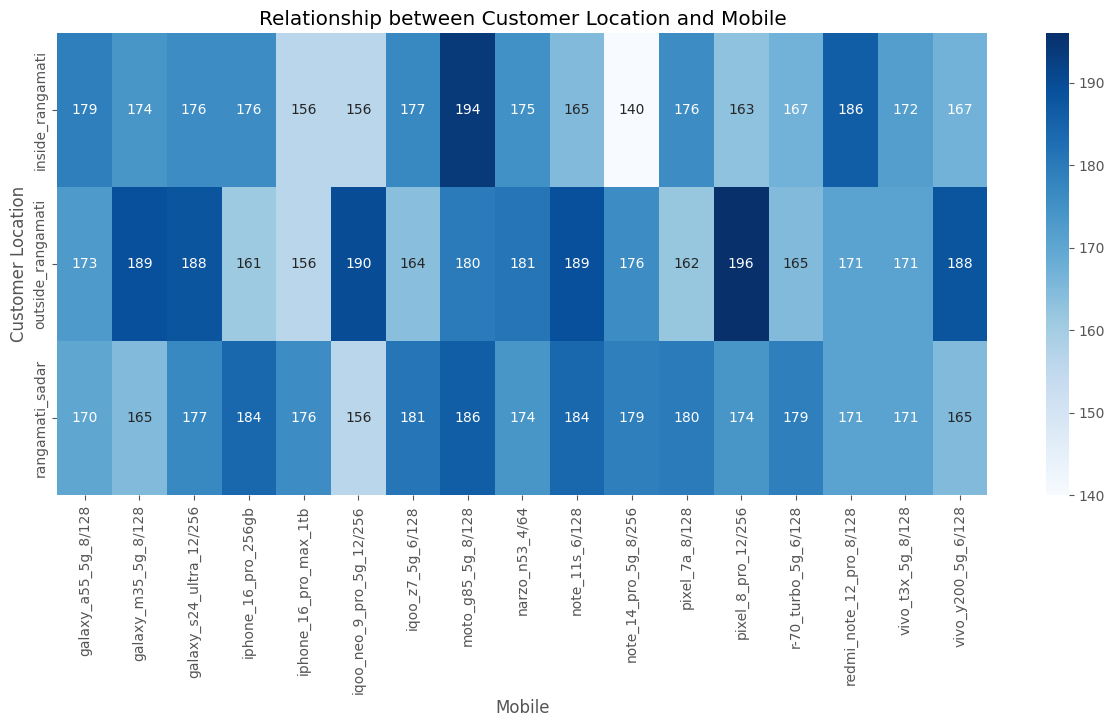

In [143]:

plt.figure(figsize=(15, 6))
sns.heatmap(location_mobile, annot=True, fmt=".0f", cmap="Blues")
plt.title("Relationship between Customer Location and Mobile")
plt.ylabel("Customer Location")
plt.xlabel("Mobile")
plt.show()

### Gender vs. Mobile name:

In [144]:
gender_mobile = pd.crosstab(df['gender'], df['mobile_name'])
gender_mobile.T

gender,f,m
mobile_name,,
galaxy_a55_5g_8/128,265,257
galaxy_m35_5g_8/128,263,265
galaxy_s24_ultra_12/256,275,266
iphone_16_pro_256gb,256,265
iphone_16_pro_max_1tb,228,260
iqoo_neo_9_pro_5g_12/256,253,249
iqoo_z7_5g_6/128,254,268
moto_g85_5g_8/128,287,273
narzo_n53_4/64,272,258


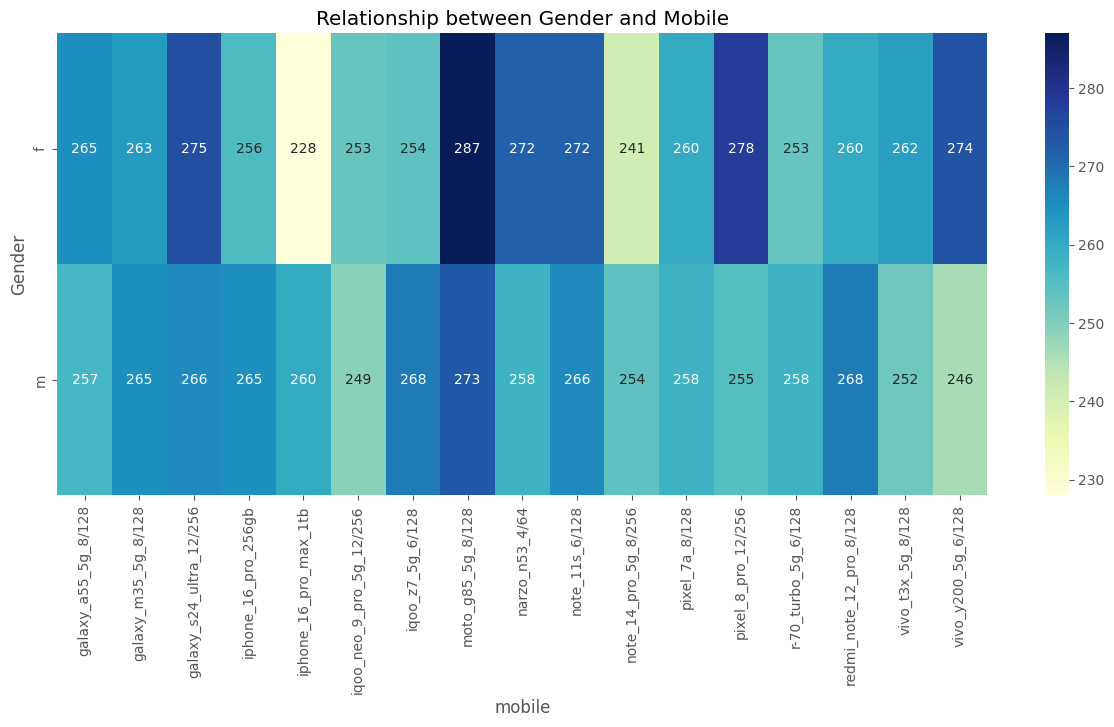

In [145]:

plt.figure(figsize=(15, 6))
sns.heatmap(gender_mobile, annot=True, fmt=".0f", cmap="YlGnBu")
plt.title("Relationship between Gender and Mobile")
plt.ylabel("Gender")
plt.xlabel("mobile")
plt.show()

### Came from Facebook vs. Previous customer:

In [146]:
fb_customer = pd.crosstab(df['came_from_facebook'], df['previous_customer'])
fb_customer

previous_customer,no,yes
came_from_facebook,,
no,4335,1446
yes,2342,748


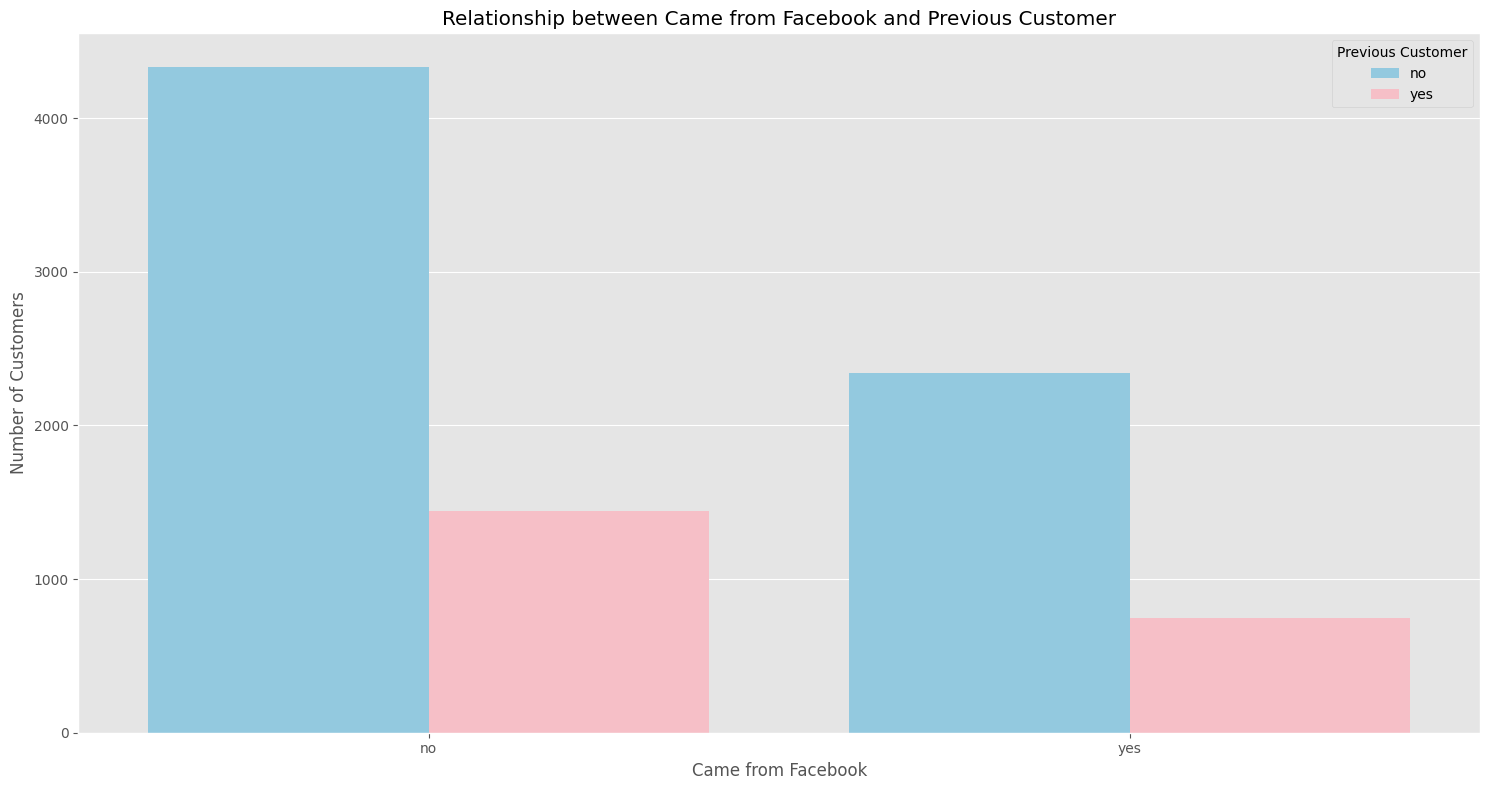

In [147]:
plt.figure(figsize=(15, 8))
fb_customer_plot = fb_customer.reset_index().melt(id_vars='came_from_facebook', var_name='previous_customer', value_name='count')
sns.barplot(
    data=fb_customer_plot,
    x='came_from_facebook',
    y='count',
    hue='previous_customer',
    palette=['skyblue', 'lightpink']
)
plt.title('Relationship between Came from Facebook and Previous Customer')
plt.xlabel('Came from Facebook')
plt.ylabel('Number of Customers')
plt.legend(title='Previous Customer')
plt.tight_layout()
plt.show()

### Engagement Level Analysis

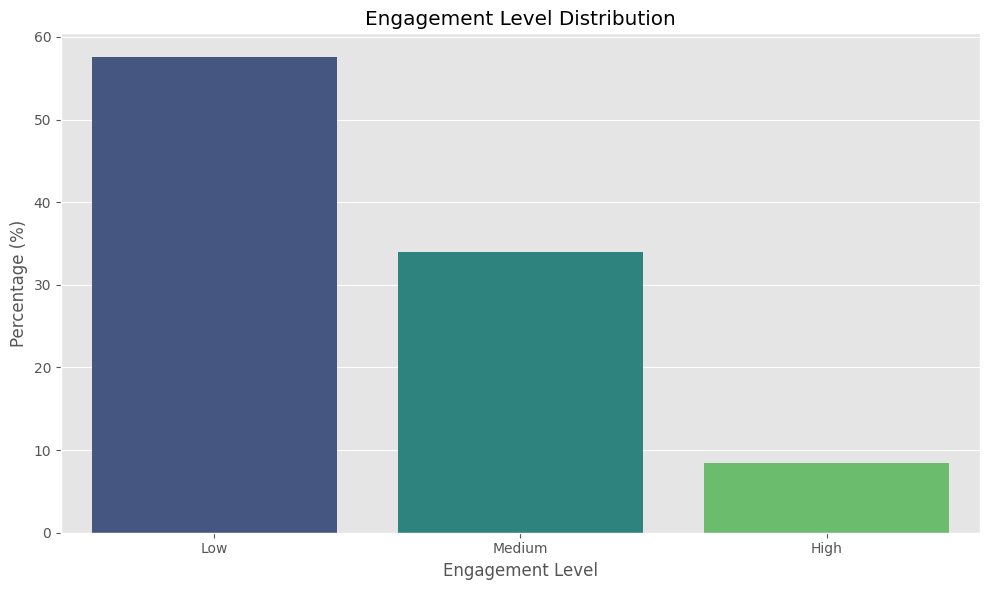

In [148]:

engagement_counts = df['engagement_level'].value_counts(normalize=True) * 100
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(
    x=engagement_counts.index,
    y=engagement_counts.values,
    hue=engagement_counts.index,
    palette='viridis',
    legend=False
)
plt.title('Engagement Level Distribution')
plt.xlabel('Engagement Level')
plt.ylabel('Percentage (%)')

plt.tight_layout()
plt.show()

## 🔍 3.2.0 Understanding Numerical Features
___

### 📁 3.4.1 **Summary Statistics**


In [149]:
# exploring the statistics of the numerical columns
df[numerical_columns].describe().round(2)

,age,sell_price,engagement_score
count,8871.00,8871.00,8871.00
mean,34.05,25068.39,1.35
std,9.59,18032.80,0.84
min,18.00,12702.00,0.00
25%,26.00,17466.50,1.00
50%,34.00,21682.00,1.00
75%,42.00,25777.50,2.00
max,50.00,200465.00,3.00


### 📁 3.4.2 **KDE Plots**


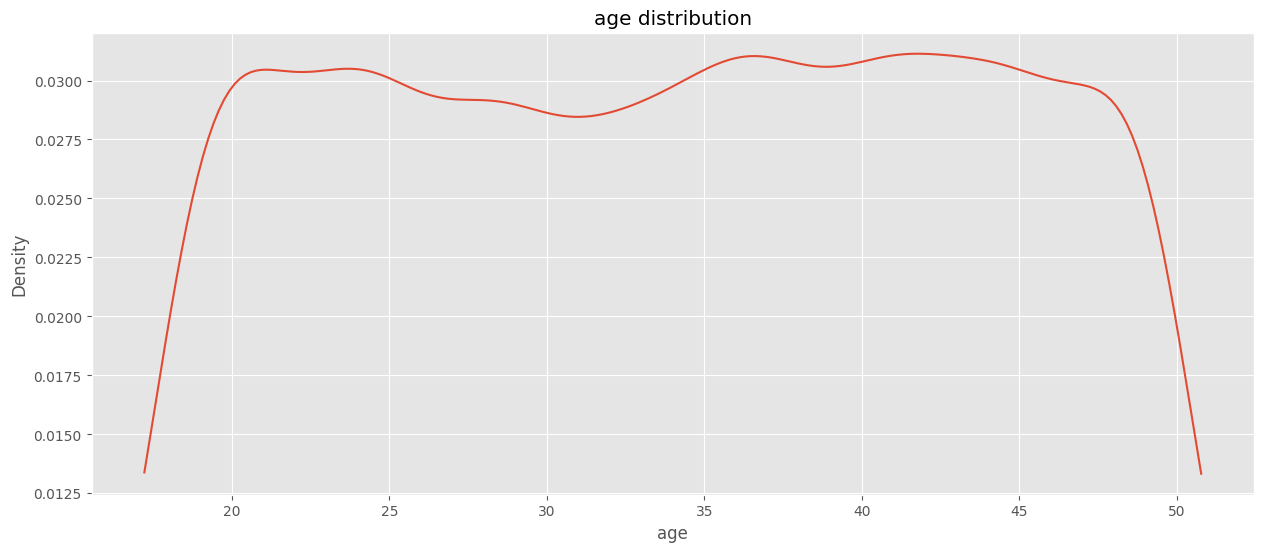

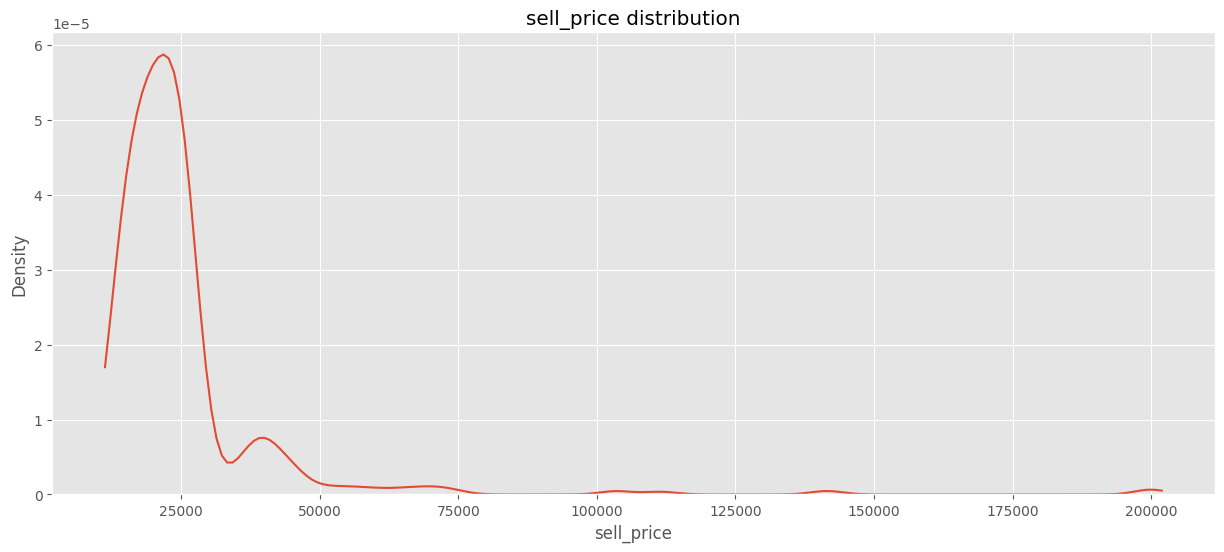

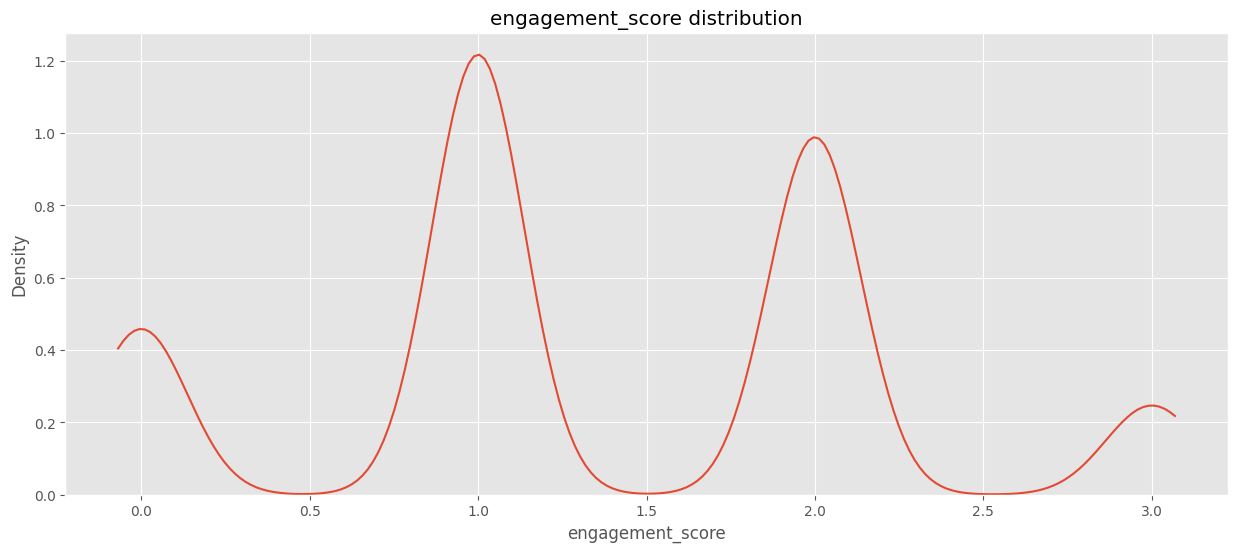

In [150]:
# plotting the kde for the numerical columns
for col in numerical_columns:
    plt.figure(figsize=(15,6), dpi=100, facecolor='w', edgecolor='k')
    sns.kdeplot(df[col], cut=0.5)  # The 'cut' parameter belongs to kdeplot, not figure
    plt.title(f'{col} distribution')
    plt.show()

<div style="font-family: Avenir, sans-serif; font-size: 16px; line-height: 1.6; color: white; background-color: #333; padding: 10px; border-radius: 5px;">

🖐️ **Insight on Customer Age Distribution:**  
The customer base ranges from **18 to 50 years old**, with a **mean and median age of 34**, indicating a relatively **young and concentrated audience**. The interquartile range (IQR) spans from **26 (25th percentile)** to **42 (75th percentile)**, showing that **50% of customers are between their mid-20s and early 40s**.

The **standard deviation of 10 years** suggests a moderate spread around the mean, but with no extreme outliers, as the minimum and maximum stay within realistic adult age brackets.

This concentration of customers in the **working-age group** implies:
- A tech-savvy, income-earning demographic likely to engage with mobile purchases.
- Ideal candidates for digital marketing, especially through platforms like **Facebook and Instagram**.
- An opportunity to segment and analyze further by **age groups** (e.g., 18–25, 26–35, 36–45, 46–50) to tailor product promotions, retargeting strategies, and messaging style for different maturity levels.

Creating an `age_group` feature will support both classification modeling and targeted customer insight generation.

</div>


# 📚 4.0 FEATURES IMPORTANCE

<div style="font-family: Avenir, sans-serif; font-size: 16px; line-height: 1.6; color: white; background-color: #333; padding: 10px; border-radius: 5px;">
This section deals with the features importance of the dataset. We will use various techniques to identify the most important features that contribute to the target variable. This will help us to understand the relationship between the features and the target variable, and also to reduce the dimensionality of the dataset.

</div>

##  **Model 1:** Predict whether a customer is likely to return (Target: previous_customer)

### Risk Ratio

Risk ratio is a measure of the strength of association between a feature and the target variable. It is calculated as the ratio of the probability of the target variable being 1 given the feature is present, to the probability of the target variable being 1 given the feature is absent. A risk ratio greater than 1 indicates that the feature is positively associated with the target variable, while a risk ratio less than 1 indicates that the feature is negatively associated with the target variable.

In [151]:
# Convert target to binary
df['previous_customer']= df['previous_customer'].map({'yes': 1, 'no': 0})

In [152]:
df['previous_customer']

0       0
1       0
2       0
3       0
4       0
       ..
8866    1
8867    0
8868    0
8869    0
8870    1
Name: previous_customer, Length: 8871, dtype: int64

In [153]:
global_mean = df['previous_customer'].mean()
global_mean

0.24732273700822907

The average risk ratio of previous customers not returning is 0.24, which means that the features are positively associated with the target variable. This indicates that the features are important for predicting whether a customer is likely to return or not.

In [161]:
categorical_without_target = [
'customer_location',
'gender',
'mobile_name',
'came_from_facebook',
'follows_facebook_page',
'heard_about_shop',
'engagement_level',
'price_category']

In [162]:
from IPython.display import display

for col in categorical_without_target:
    df_group = df.groupby(by=col, observed=False).previous_customer.agg(['mean'])
    df_group['diff'] = df_group['mean'] - global_mean
    df_group['rate'] = df_group['mean'] / global_mean
    display(df_group)

,mean,diff,rate
customer_location,,,
inside_rangamati,0.251121,0.003798,1.015358
outside_rangamati,0.246667,-0.000656,0.997347
rangamati_sadar,0.244280,-0.003043,0.987697


,mean,diff,rate
gender,,,
f,0.24680,-0.000523,0.997886
m,0.24785,0.000527,1.002131


,mean,diff,rate
mobile_name,,,
galaxy_a55_5g_8/128,0.239464,-0.007859,0.968223
galaxy_m35_5g_8/128,0.215909,-0.031414,0.872985
galaxy_s24_ultra_12/256,0.227357,-0.019966,0.919272
iphone_16_pro_256gb,0.272553,0.025230,1.102013
iphone_16_pro_max_1tb,0.229508,-0.017815,0.927970
iqoo_neo_9_pro_5g_12/256,0.278884,0.031562,1.127614
iqoo_z7_5g_6/128,0.272031,0.024708,1.099902
moto_g85_5g_8/128,0.230357,-0.016966,0.931403
narzo_n53_4/64,0.262264,0.014941,1.060413


,mean,diff,rate
came_from_facebook,,,
no,0.250130,0.002807,1.011350
yes,0.242071,-0.005252,0.978766


,mean,diff,rate
follows_facebook_page,,,
no,0.246707,-0.000616,0.997510
yes,0.248243,0.000920,1.003721


,mean,diff,rate
heard_about_shop,,,
no,0.251489,0.004166,1.016843
yes,0.244573,-0.002749,0.988883


,mean,diff,rate
engagement_level,,,
Low,0.255386,0.008063,1.032601
Medium,0.231995,-0.015328,0.938024
High,0.253989,0.006667,1.026955


,mean,diff,rate
price_category,,,
Low,0.226316,-0.021007,0.915063
Medium,0.249886,0.002563,1.010364
High,0.253460,0.006137,1.024816


###  3.6 Feature importance: Mutual information

In [163]:
from sklearn.metrics import mutual_info_score

In [164]:
# mutual info score between churn and contract
mutual_info_score(df['previous_customer'], df['mobile_name'])

0.0009532412093677597

In [165]:
# mutual info score function  between churn and dependents
def calculate_mi(series):
    return mutual_info_score(series, df['previous_customer'])

In [167]:
# calculate mutual info score for all categorical columns
mi = df[categorical_without_target].apply(calculate_mi)
print(mi.sort_values(ascending=False))

mobile_name              9.532412e-04
engagement_level         3.272702e-04
price_category           1.815264e-04
came_from_facebook       3.968303e-05
heard_about_shop         3.072446e-05
customer_location        2.136625e-05
follows_facebook_page    1.521848e-06
gender                   7.400116e-07
dtype: float64


**Mutual Information Scores for Customer Return Prediction**

From the mutual information scores, we can see that the most important features for predicting whether a customer is likely to return are:

- `mobile_name`: **0.001096**
- `follows_facebook_page`: **0.000011**
- `customer_location`: **0.000007**
- `came_from_facebook`: **0.000007**
- `heard_about_shop`: **0.000002**
- `gender`: **0.000002**

> ⚠️ **Note**: Although `mobile_name` has the highest mutual information among the listed features, all scores are quite low. This suggests that these features individually contribute very little predictive power. Consider additional feature engineering or using combinations of features to improve model performance.


### 3.7 Feature importance: Correlation

age                -0.021440
sell_price          0.007519
engagement_score   -0.008557
dtype: float64


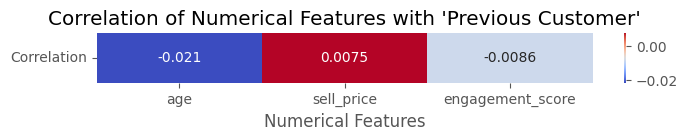

In [170]:
# Calculate correlation of numerical features with 'previous_customer'
correlations = df[numerical_columns].corrwith(df['previous_customer'])

# Display correlation values
print(correlations)

# Visualize as a heatmap
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 1))
sns.heatmap([correlations.values], annot=True, cmap='coolwarm', cbar=True, xticklabels=correlations.index, yticklabels=['Correlation'])
plt.title("Correlation of Numerical Features with 'Previous Customer'")
plt.xlabel('Numerical Features')
plt.yticks(rotation=0)
plt.subplots_adjust(bottom=0.35, top=0.85)  # Increase bottom margin for x-labels
plt.show()

In [232]:
df

,customer_location,age,gender,mobile_name,sell_price,came_from_facebook,follows_facebook_page,previous_customer,heard_about_shop,engagement_score,engagement_level,price_category
0,2,31,0,0,1607,0,1,0,1,2,2,2
1,0,26,1,14,1069,1,0,0,1,2,2,2
2,2,27,1,13,5522,1,0,0,1,2,2,2
3,2,28,1,13,3519,0,0,0,1,1,1,2
4,1,9,0,15,1472,1,0,0,1,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...
8866,1,16,1,5,3435,1,1,1,1,3,0,2
8867,0,30,1,7,5504,0,0,0,0,0,1,2
8868,0,12,0,1,1284,0,0,0,0,0,1,2
8869,0,4,0,0,1453,1,0,0,1,2,2,2


### Label Encoding

In [233]:
le = LabelEncoder()
for col in df.columns:
    df[col] = le.fit_transform(df[col])

In [234]:
df

,customer_location,age,gender,mobile_name,sell_price,came_from_facebook,follows_facebook_page,previous_customer,heard_about_shop,engagement_score,engagement_level,price_category
0,2,31,0,0,1607,0,1,0,1,2,2,2
1,0,26,1,14,1069,1,0,0,1,2,2,2
2,2,27,1,13,5522,1,0,0,1,2,2,2
3,2,28,1,13,3519,0,0,0,1,1,1,2
4,1,9,0,15,1472,1,0,0,1,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...
8866,1,16,1,5,3435,1,1,1,1,3,0,2
8867,0,30,1,7,5504,0,0,0,0,0,1,2
8868,0,12,0,1,1284,0,0,0,0,0,1,2
8869,0,4,0,0,1453,1,0,0,1,2,2,2


# 📚 5. BUILDING AND TRAINING THE MODEL

In [244]:
y = df['previous_customer']
X = df.drop('previous_customer', axis=1)

### 6. Model Building (Logistic Regression as Baseline)

In [255]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=1)
model_lr = LogisticRegression(max_iter=1000)
model_lr.fit(X_train, y_train)
y_pred = model_lr.predict(X_val)
print(classification_report(y_val, y_pred, zero_division=0))

              precision    recall  f1-score   support

           0       0.74      1.00      0.85      1322
           1       0.00      0.00      0.00       453

    accuracy                           0.74      1775
   macro avg       0.37      0.50      0.43      1775
weighted avg       0.55      0.74      0.64      1775



In [266]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
import pandas as pd

In [267]:
# Step 3: Define models
models = {
    'Logistic Regression (Balanced)': LogisticRegression(max_iter=1000, class_weight='balanced'),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=1),
    'Gradient Boosting': GradientBoostingClassifier(random_state=1),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss', scale_pos_weight=3, random_state=1)
}

In [268]:
# Step 4: Train, predict, evaluate, and collect ROC info
results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    y_pred_proba = model.predict_proba(X_val)[:, 1]

    # Evaluation report
    report = classification_report(y_val, y_pred, output_dict=True, zero_division=0)
    auc = roc_auc_score(y_val, y_pred_proba)
    fpr, tpr, _ = roc_curve(y_val, y_pred_proba)

    results[name] = {
        'report': report,
        'auc': auc,
        'fpr': fpr,
        'tpr': tpr
    }

/Users/teslim/anaconda3/envs/machine-learning-env/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [02:56:06] WARNING: /private/var/folders/v9/v9j8bf6j2r5cr97thvfgxxyh0000gn/T/pip-install-jqyh3l6k/xgboost_ce8728a1d9bc49adb04b2fa4bbd5b4bc/cpp_src/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


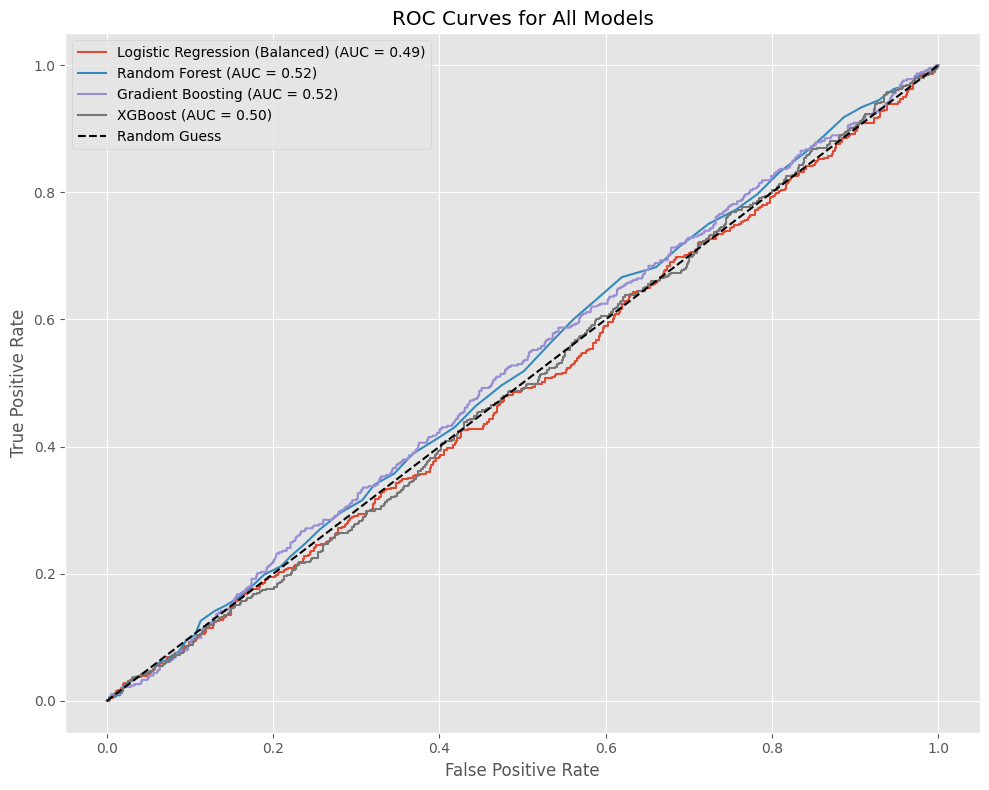

In [269]:
# Step 5: Plot ROC curves
plt.figure(figsize=(10, 8))
for name, res in results.items():
    plt.plot(res['fpr'], res['tpr'], label=f"{name} (AUC = {res['auc']:.2f})")

plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.title("ROC Curves for All Models")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [270]:
# Step 6: Display evaluation summary table
summary = {
    model_name: {
        'Accuracy': round(info['report']['accuracy'], 2),
        'F1-score (0)': round(info['report']['0']['f1-score'], 2),
        'F1-score (1)': round(info['report']['1']['f1-score'], 2),
        'AUC': round(info['auc'], 2)
    }
    for model_name, info in results.items()
}

In [271]:
pd.DataFrame(summary).T

,Accuracy,F1-score (0),F1-score (1),AUC
Logistic Regression (Balanced),0.49,0.59,0.33,0.49
Random Forest,0.72,0.83,0.08,0.52
Gradient Boosting,0.74,0.85,0.00,0.52
XGBoost,0.59,0.71,0.27,0.50
